## EDA And Feature Engineering Of Google Play Store Dataset

Problem statement.
Today, 1.85 million different apps are available for users to download. Android users have even more from which to choose, with 2.56 million available through the Google Play Store. These apps have come to play a huge role in the way we live our lives today. Our Objective is to find the Most Popular Category, find the App with largest number of installs , the App with largest size etc.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from warnings import filterwarnings

warnings.filterwarnings('ignore')

 

%matplotlib inline

In [2]:
df =pd.read_csv("https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv")

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
df.shape

(10841, 13)

In [6]:
# Description of Rating Column
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [7]:
# Checking the missing values

In [8]:
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# DATA CLEANING

# Insights and Observations on columns

In [9]:
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [10]:
df['Reviews'].str.isnumeric().sum()

10840

In [11]:
#df['Reviews'].astype(int)

In [12]:
# Negate of Reviews Column which gives the existing String values from the Reviews column of dataframe

In [13]:
df[~df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [14]:
df['Reviews'].nunique()

6002

In [15]:
# copying the original dataframe for further data cleaning and validation purpose

In [16]:
df_copy =df.copy()

In [17]:
df_copy

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [18]:
df_copy.drop(10472,axis=0,inplace=True)

In [19]:
df_copy[~df_copy['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [20]:
# Converting Reviews datatype from object to int

In [21]:
df_copy['Reviews'] =df_copy['Reviews'].astype(int)

In [22]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.2+ MB


In [23]:
df_copy['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [24]:
# Converting all values into k's and changing the type of Size column

In [25]:
df_copy['Size'] =df_copy['Size'].str.replace('M','000')
df_copy['Size'] =df_copy['Size'].str.replace('k','')
df_copy['Size'] =df_copy['Size'].replace('Varies with device',np.nan)
df_copy['Size'] =df_copy['Size'].astype(float)

In [26]:
df_copy['Size']

0        19000.0
1        14000.0
2            8.7
3        25000.0
4            2.8
          ...   
10836    53000.0
10837        3.6
10838        9.5
10839        NaN
10840    19000.0
Name: Size, Length: 10840, dtype: float64

In [27]:
df_copy['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [28]:
df_copy['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [29]:
# Removing the Special Characters from Installa and Price column

In [30]:
chars_to_remove=[",","+","$"]
col_to_check =["Installs","Price"]
for i in chars_to_remove:
    for col in col_to_check:
        df_copy[col] =df_copy[col].str.replace(i,"")

In [31]:
df_copy['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [32]:
df_copy['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [33]:
df_copy['Price'] =df_copy['Price'].astype(float)
df_copy['Installs'] =df_copy['Installs'].astype(int)

In [34]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.2+ MB


In [35]:
df_copy['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [36]:
df_copy['Last Updated'] =pd.to_datetime(df_copy['Last Updated'])

In [37]:
df_copy['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 10840, dtype: datetime64[ns]

In [38]:
df_copy['day'] =df_copy['Last Updated'].dt.day
df_copy['month'] =df_copy['Last Updated'].dt.month
df_copy['year'] =df_copy['Last Updated'].dt.year

In [39]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,day,month,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


In [40]:
df_copy.to_csv('playstore_data/cleaned_dataset.csv')

In [41]:
df2 =pd.read_csv("playstore_data/cleaned_dataset.csv")

# EDA

In [42]:
df2.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,day,month,year
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


In [43]:
df2.drop('Unnamed: 0',axis=1,inplace=True)

In [44]:
# Checking Duplicate values from App Column

In [45]:
df2['App'].nunique()

9659

## checking whether dataset consists of duplicate rows/records

In [46]:
df2[df2.duplicated('App')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,day,month,year
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,NaN,5000000,Free,0.0,Everyone,Business,2018-02-26,Varies with device,4.0.3 and up,26,2,2018
236,Box,BUSINESS,4.2,159872,NaN,10000000,Free,0.0,Everyone,Business,2018-07-31,Varies with device,Varies with device,31,7,2018
239,Google My Business,BUSINESS,4.4,70991,NaN,5000000,Free,0.0,Everyone,Business,2018-07-24,2.19.0.204537701,4.4 and up,24,7,2018
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37000.0,10000000,Free,0.0,Everyone,Business,2018-07-20,4.1.28165.0716,4.0 and up,20,7,2018
261,join.me - Simple Meetings,BUSINESS,4.0,6989,NaN,1000000,Free,0.0,Everyone,Business,2018-07-16,4.3.0.508,4.4 and up,16,7,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10714,FarmersOnly Dating,DATING,3.0,1145,1.4,100000,Free,0.0,Mature 17+,Dating,2016-02-25,2.2,4.0 and up,25,2,2016
10719,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0,1000000,Free,0.0,Everyone,Communication,2018-07-06,5.2,5.0 and up,6,7,2018
10729,FP Notebook,MEDICAL,4.5,410,60000.0,50000,Free,0.0,Everyone,Medical,2018-03-24,2.1.0.372,4.4 and up,24,3,2018
10752,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12000.0,1000000,Free,0.0,Everyone,Shopping,2018-07-30,3.9,4.4 and up,30,7,2018


In [47]:
df_copy[df_copy['App']=='AAFP']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,day,month,year
2515,AAFP,MEDICAL,3.8,63,24000.0,10000,Free,0.0,Everyone,Medical,2018-06-22,2.3.1,5.0 and up,22,6,2018
10768,AAFP,MEDICAL,3.8,63,24000.0,10000,Free,0.0,Everyone,Medical,2018-06-22,2.3.1,5.0 and up,22,6,2018


## Removing Duplicate Records on App Column

In [48]:
df_copy =df_copy.drop_duplicates(subset='App',keep='first')

In [49]:
df_copy.shape

(9659, 16)

In [50]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9659 non-null   object        
 1   Category        9659 non-null   object        
 2   Rating          8196 non-null   float64       
 3   Reviews         9659 non-null   int64         
 4   Size            8432 non-null   float64       
 5   Installs        9659 non-null   int64         
 6   Type            9658 non-null   object        
 7   Price           9659 non-null   float64       
 8   Content Rating  9659 non-null   object        
 9   Genres          9659 non-null   object        
 10  Last Updated    9659 non-null   datetime64[ns]
 11  Current Ver     9651 non-null   object        
 12  Android Ver     9657 non-null   object        
 13  day             9659 non-null   int64         
 14  month           9659 non-null   int64         
 15  yea

In [51]:
numerical_columns =[cols for cols in df_copy.columns if df_copy[cols].dtype!='object']
categorical_columns =[cols for cols in df_copy.columns if df_copy[cols].dtype=='object']

print("We have {} features of numerical Attributes in the dataset {}".format(len(numerical_columns),numerical_columns))
print("We have {} features of Categorical Attributes in the dataset {}".format(len(categorical_columns),categorical_columns))

We have 9 features of numerical Attributes in the dataset ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated', 'day', 'month', 'year']
We have 7 features of Categorical Attributes in the dataset ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


In [52]:
numerical_columns

['Rating',
 'Reviews',
 'Size',
 'Installs',
 'Price',
 'Last Updated',
 'day',
 'month',
 'year']

In [53]:
categorical_columns

['App',
 'Category',
 'Type',
 'Content Rating',
 'Genres',
 'Current Ver',
 'Android Ver']

In [54]:
# Proportion of count data on categorical column

In [55]:
for num,col in enumerate(df.columns):
    val =df[col].value_counts(normalize=True)*100
    print("{} column categorical values count is{}".format(num,val))

    print("----------------------------------------")

0 column categorical values count isROBLOX                                                0.083018
CBS Sports App - Scores, News, Stats & Watch Live     0.073794
ESPN                                                  0.064570
Duolingo: Learn Languages Free                        0.064570
Candy Crush Saga                                      0.064570
                                                        ...   
Meet U - Get Friends for Snapchat, Kik & Instagram    0.009224
U-Report                                              0.009224
U of I Community Credit Union                         0.009224
Waiting For U Launcher Theme                          0.009224
iHoroscope - 2018 Daily Horoscope & Astrology         0.009224
Name: App, Length: 9660, dtype: float64
----------------------------------------
1 column categorical values count isFAMILY                 18.190204
GAME                   10.552532
TOOLS                   7.776035
MEDICAL                 4.270824
BUSINESS              

In [56]:
# proportion of count plot on numerical attriutes/columns

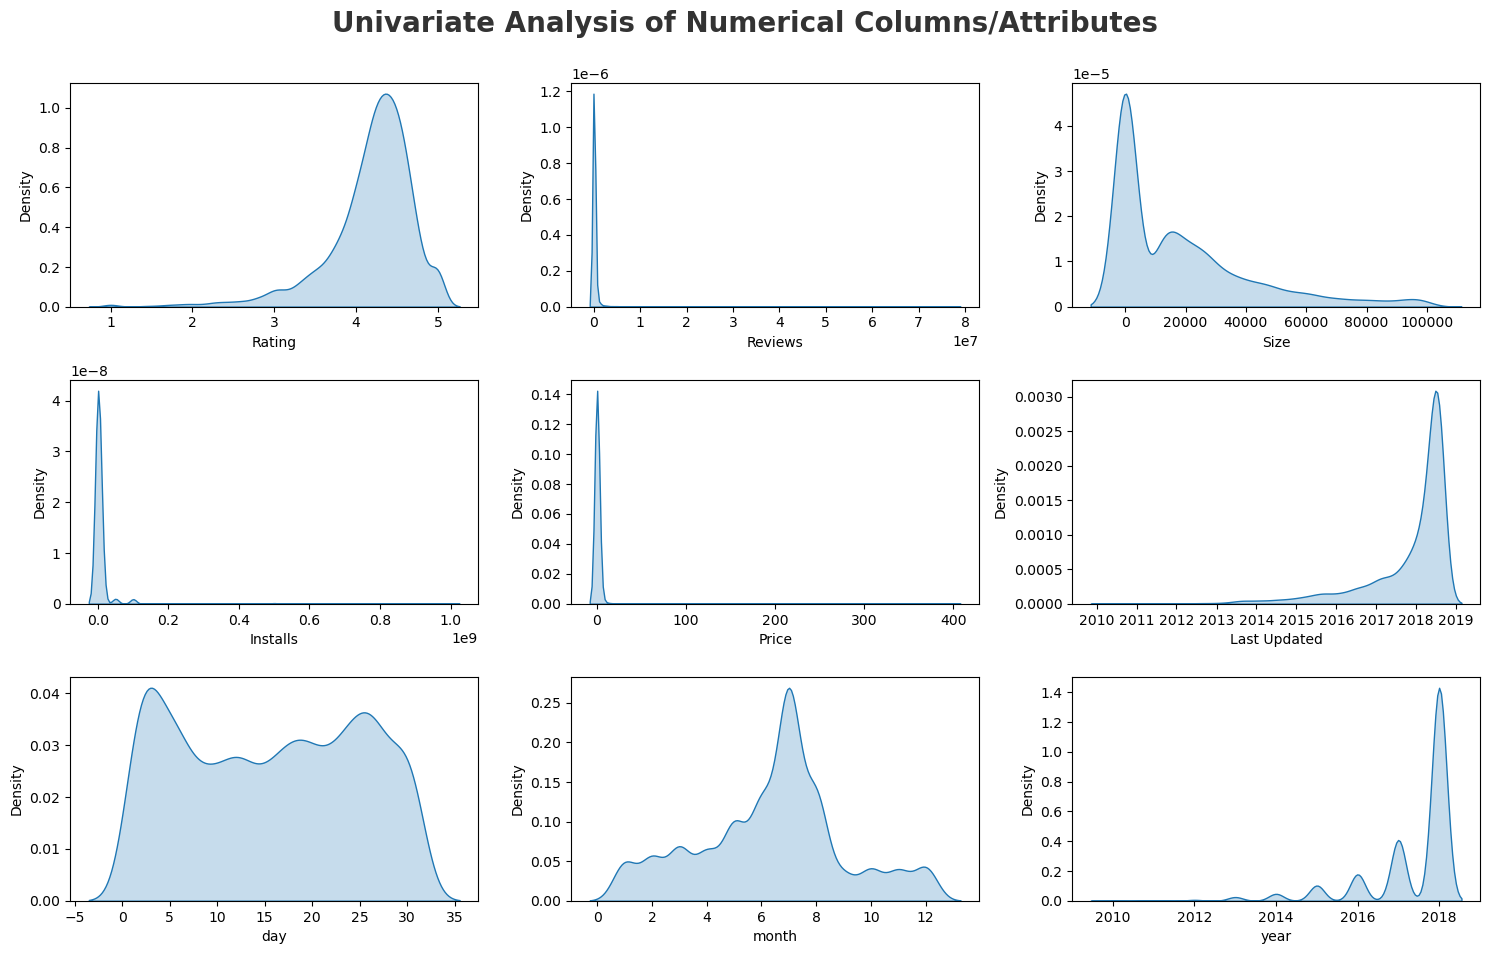

In [57]:
plt.figure(figsize=(15,15))
plt.suptitle("Univariate Analysis of Numerical Columns/Attributes",fontsize=20,fontweight='bold',alpha=0.8,y=1.)

for i in range(0,len(numerical_columns)):
    plt.subplot(5,3,i+1)

    sns.kdeplot(data=df_copy,x=df_copy[numerical_columns[i]],shade=True)
    plt.xlabel(numerical_columns[i])
    plt.tight_layout()

## From above KDE Analysis we can say that Rating, Last Updated were showing left skewwed distribution whereas Reviews,Installs,price, size attribute were showing right skewwd distribution

In [58]:
categorical_columns

['App',
 'Category',
 'Type',
 'Content Rating',
 'Genres',
 'Current Ver',
 'Android Ver']

In [59]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [60]:
categorical_columns

['App',
 'Category',
 'Type',
 'Content Rating',
 'Genres',
 'Current Ver',
 'Android Ver']

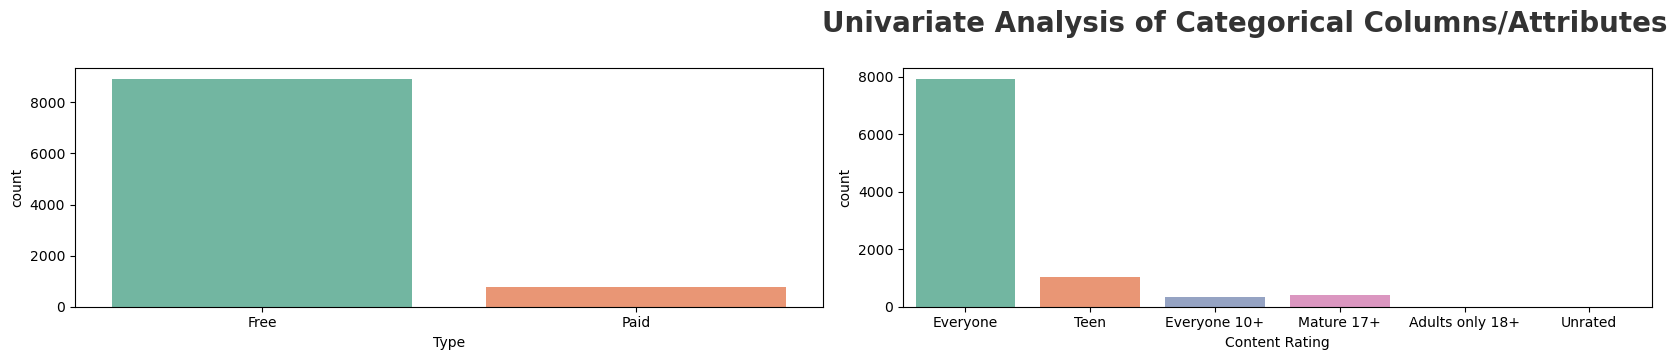

In [61]:
plt.figure(figsize=(25,15))
plt.suptitle("Univariate Analysis of Categorical Columns/Attributes",fontsize=20,fontweight='bold',alpha=0.8,y=1.)
category =['Type','Content Rating']
for i in range(0,len(category)):
    plt.subplot(5,3,i+1)

    sns.countplot(data=df_copy,x=df_copy[category[i]],palette="Set2")
    plt.xlabel(category[i])
    plt.tight_layout()

<AxesSubplot: ylabel='Category'>

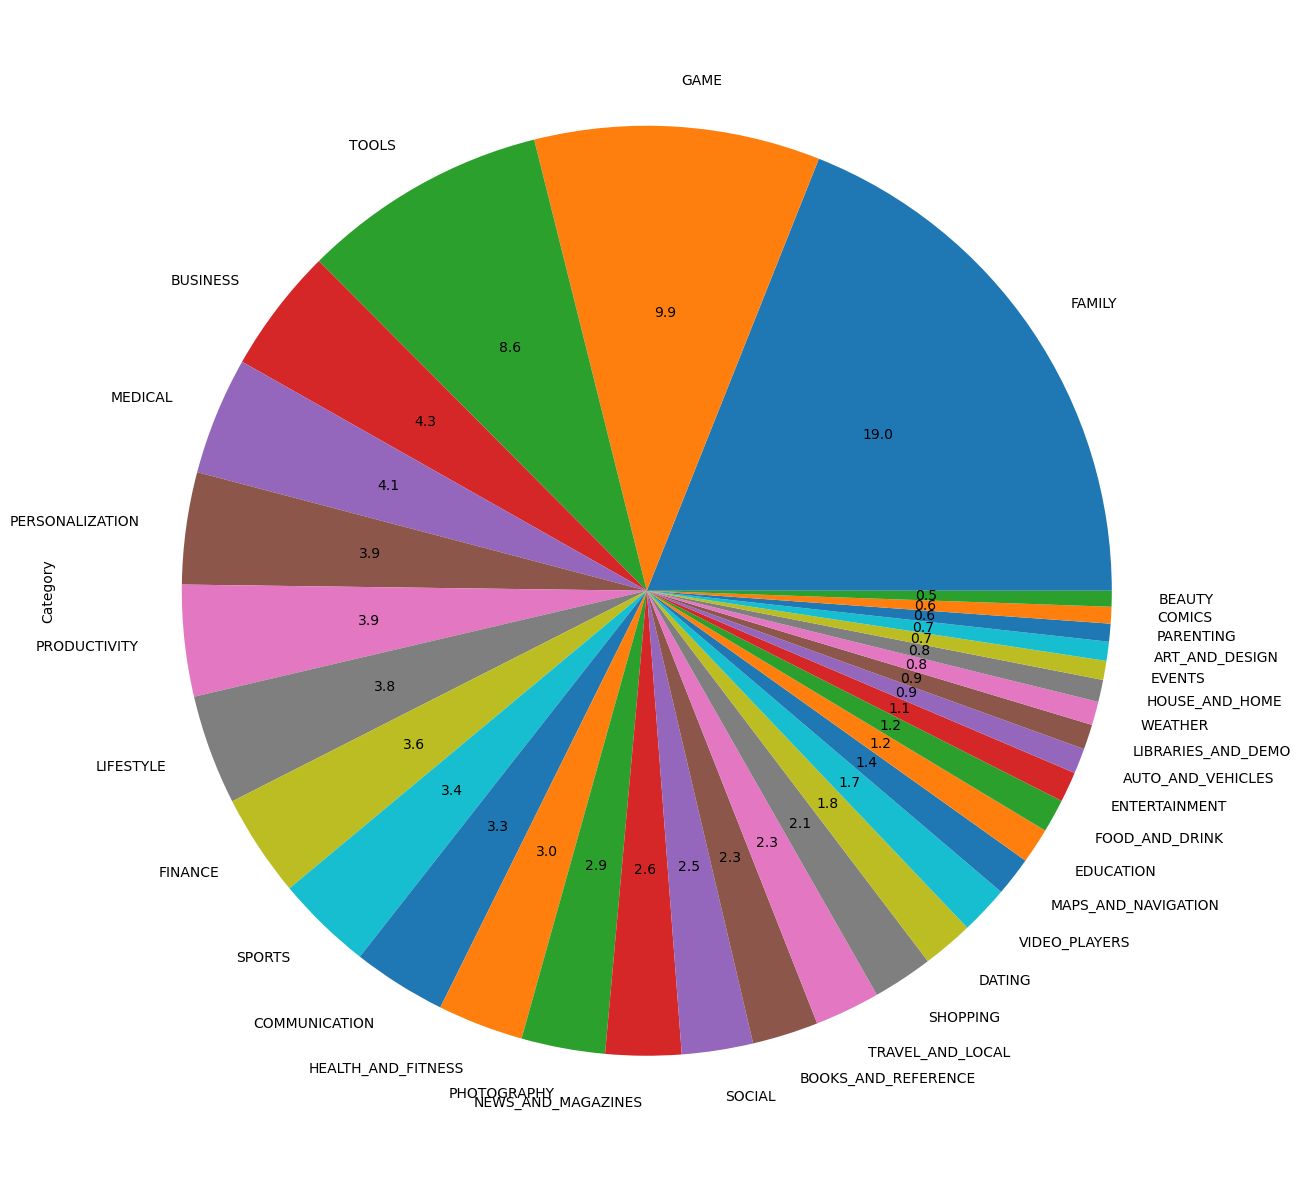

In [62]:
df_copy['Category'].value_counts().plot.pie(x=df['Category'],figsize=(15,18),autopct="%1.1f")

            Exploratory Data Analysis                      Assignment Questions                                    March-25                     

# Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does the dataset have?


In [63]:
df_copy.shape
#sns.heatmap(df.corr())

(9659, 16)

In [64]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,day,month,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


In [65]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9659 non-null   object        
 1   Category        9659 non-null   object        
 2   Rating          8196 non-null   float64       
 3   Reviews         9659 non-null   int64         
 4   Size            8432 non-null   float64       
 5   Installs        9659 non-null   int64         
 6   Type            9658 non-null   object        
 7   Price           9659 non-null   float64       
 8   Content Rating  9659 non-null   object        
 9   Genres          9659 non-null   object        
 10  Last Updated    9659 non-null   datetime64[ns]
 11  Current Ver     9651 non-null   object        
 12  Android Ver     9657 non-null   object        
 13  day             9659 non-null   int64         
 14  month           9659 non-null   int64         
 15  yea

# Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different app categories.

In [149]:
'''
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and a grid of subplots
fig, axes = plt.subplots(6, 6, figsize=(40, 40))

# Loop through the categories and plot box plots
for i, category in enumerate(df_copy['Category'].unique()):
    row = i // 6
    col = i % 6
    
    sns.boxplot(data=df_copy[df_copy['Category'] == category], x='Category', y='Rating', ax=axes[row, col])
    axes[row, col].set_title(f'Rating vs {category}')
    axes[row, col].set_xticklabels([category])
    
# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()
'''

"\nimport seaborn as sns\nimport matplotlib.pyplot as plt\n\n# Create a figure and a grid of subplots\nfig, axes = plt.subplots(6, 6, figsize=(40, 40))\n\n# Loop through the categories and plot box plots\nfor i, category in enumerate(df_copy['Category'].unique()):\n    row = i // 6\n    col = i % 6\n    \n    sns.boxplot(data=df_copy[df_copy['Category'] == category], x='Category', y='Rating', ax=axes[row, col])\n    axes[row, col].set_title(f'Rating vs {category}')\n    axes[row, col].set_xticklabels([category])\n    \n# Adjust layout\nplt.tight_layout()\n\n# Show the plots\nplt.show()\n"

In [67]:
df_copy[['Category','Rating']]#hue=df_copy["Category"])

,Category,Rating
0,ART_AND_DESIGN,4.1
1,ART_AND_DESIGN,3.9
2,ART_AND_DESIGN,4.7
3,ART_AND_DESIGN,4.5
4,ART_AND_DESIGN,4.3
...,...,...
10836,FAMILY,4.5
10837,FAMILY,5.0
10838,MEDICAL,NaN
10839,BOOKS_AND_REFERENCE,4.5


# 11. Are there any missing values in the dataset? Identify any missing values and describe how they may impact your analysis

In [68]:
df_copy.isna().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
day                  0
month                0
year                 0
dtype: int64

Missing values in the dataset leads to cause an various problems,problems as follows 

Biased Analysis: 
    
    Missing values in crucial columns might introduce bias, impacting the representativeness of the dataset. If the missingness is related to specific factors, it can skew conclusions drawn from the analysis.

Loss of Information:
    
    Missing values in significant columns can lead to a loss of valuable information, reducing the dataset's completeness and potentially hindering the ability to capture underlying patterns or relationships.

Reduced Statistical Power: 
    
    With missing values in critical columns, statistical analyses may have reduced power to detect meaningful effects or associations. This can affect hypothesis testing or the reliability of the results.

Model Performance: 
    
    In predictive modeling, missing values in important columns can impair the model's ability to learn relationships and make accurate predictions. It might result in biased estimations or reduced predictive performance.

Inaccurate Conclusions:
    
    If missing values are not appropriately handled, the conclusions drawn from analyses may be inaccurate or misleading. It might lead to incorrect decisions or actions based on flawed insights.

# Q12What is the relationship between the size of an app and its rating? Create a scatter plot to visualize the relationship.

Text(0, 0.5, 'Rating')

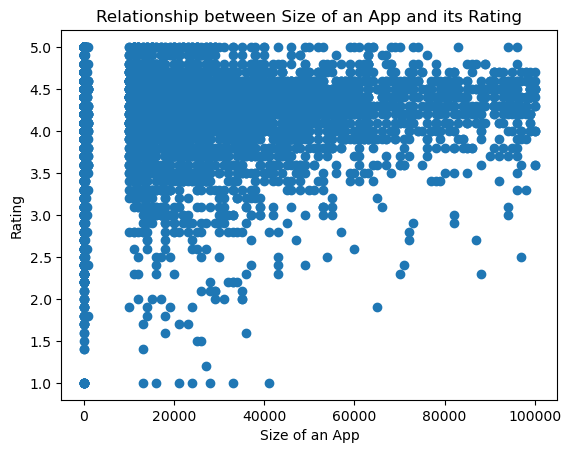

In [69]:
plt.scatter(x=df_copy['Size'],y=df_copy['Rating'])
plt.title("Relationship between Size of an App and its Rating")
plt.xlabel("Size of an App")
plt.ylabel("Rating")

From the above visual, We can clearly see that as size of the App increasing the ratings given to that application was increasing.
Also, we can that the good rated applications was more in the size between 17000 to 30000

# Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.¶

In [70]:
df_copy

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,day,month,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up,25,7,2017
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up,6,7,2018
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,1000,Free,0.0,Everyone,Medical,2017-01-20,1.0,2.2 and up,20,1,2017
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device,19,1,2015


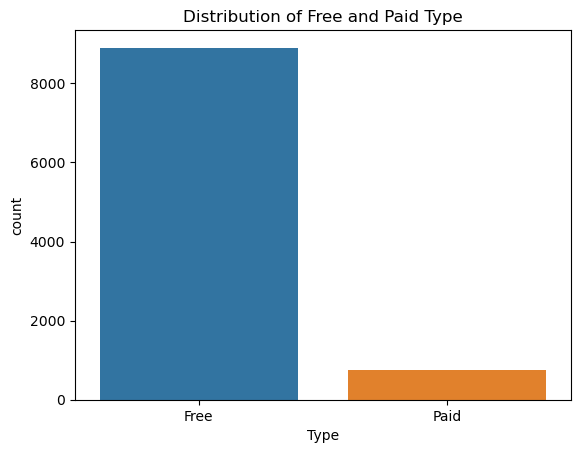

In [71]:
plt.title("Distribution of Free and Paid Type")
sns.countplot(x=df_copy["Type"])
plt.show()

In [72]:
# From, above distribution we can say that the Free app type are showing clear domination over the paid App types

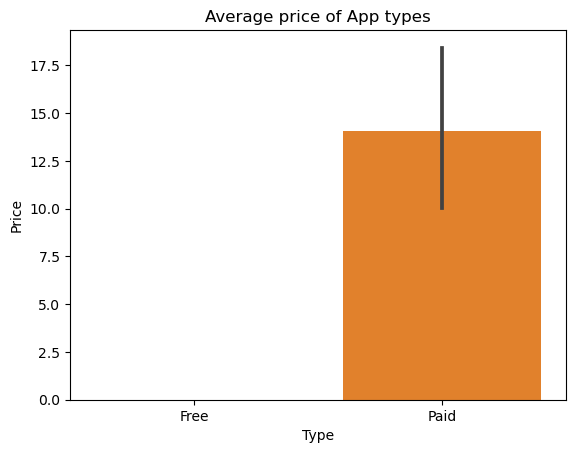

In [73]:
plt.title("Average price of App types")
sns.barplot(data=df_copy,x=df_copy["Type"],y =df_copy["Price"])
plt.show()

In [74]:
paid_apps =df_copy[df_copy['Type']=="Paid"]
paid_apps
#    df_copy["Price"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,day,month,year
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8,100000,Paid,4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up,25,3,2018
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39000.0,100000,Paid,4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up,11,4,2017
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,NaN,100000,Paid,3.99,Everyone,Communication,2018-07-05,7.5.3.20547,4.1 and up,5,7,2018
476,"Moco+ - Chat, Meet People",DATING,4.2,1545,NaN,10000,Paid,3.99,Mature 17+,Dating,2018-06-19,2.6.139,4.1 and up,19,6,2018
477,Calculator,DATING,2.6,57,6.2,1000,Paid,6.99,Everyone,Dating,2017-10-25,1.1.6,4.0 and up,25,10,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10735,FP VoiceBot,FAMILY,NaN,17,157.0,100,Paid,0.99,Mature 17+,Entertainment,2015-11-25,1.2,2.1 and up,25,11,2015
10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2.4,1000,Paid,7.99,Everyone,Health & Fitness,2018-08-08,1.9.3,4.2 and up,8,8,2018
10782,Trine 2: Complete Story,GAME,3.8,252,11000.0,10000,Paid,16.99,Teen,Action,2015-02-27,2.22,5.0 and up,27,2,2015
10785,"sugar, sugar",FAMILY,4.2,1405,9.5,10000,Paid,1.20,Everyone,Puzzle,2018-06-05,2.7,2.3 and up,5,6,2018


In [75]:
paid_apps['Price'].value_counts()

0.99      145
2.99      124
1.99       73
4.99       70
3.99       57
         ... 
18.99       1
389.99      1
19.90       1
1.75        1
1.04        1
Name: Price, Length: 91, dtype: int64

In [76]:
maxi,mini =max(paid_apps["Price"]),min(paid_apps["Price"])

In [77]:
maxi,mini

(400.0, 0.99)

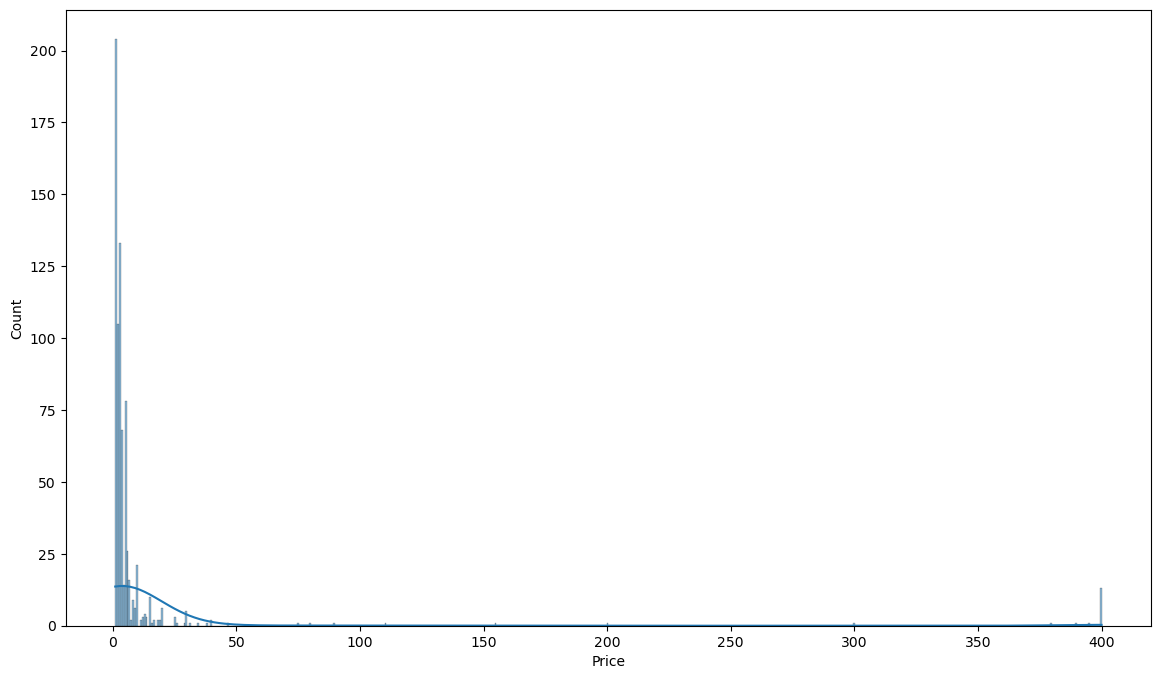

In [78]:
plt.figure(figsize=(14,8))
sns.histplot(paid_apps['Price'],kde=True)
plt.show()

In [79]:
# From above visual We can see that most of the paid app prices are falling between 0 to 50, only few apps where costing high prices 

In [80]:
df_copy[df_copy['Type']=="Paid"].median()

Rating         4.40
Reviews       88.00
Size         899.00
Installs    1000.00
Price          2.99
day           16.00
month          6.00
year        2017.00
dtype: float64

In [81]:
df_copy[df_copy['Type']=="Paid"].mean()
# Effect of outlier values made the change in average of price

Rating          4.259603
Reviews      8724.887566
Size        17238.126569
Installs    75879.472222
Price          14.045146
day            15.580688
month           6.322751
year         2016.679894
dtype: float64

In [82]:
df_copy[(df_copy["Type"]!="Free") & (df_copy["Price"]==0.0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,day,month,year
9148,Command & Conquer: Rivals,FAMILY,NaN,0,NaN,0,NaN,0.0,Everyone 10+,Strategy,2018-06-28,Varies with device,Varies with device,28,6,2018


Only the above record doesn't contain the app type and price

# Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps with the highest number of installs

In [83]:
df3 =df_copy[["App","Installs"]]

In [84]:
top10 =df3.sort_values(["Installs"],ascending=False)

In [85]:
top10.head(10)

,App,Installs
336,WhatsApp Messenger,1000000000
152,Google Play Books,1000000000
1654,Subway Surfers,1000000000
3117,Maps - Navigate & Explore,1000000000
340,Gmail,1000000000
2545,Instagram,1000000000
2544,Facebook,1000000000
338,Google Chrome: Fast & Secure,1000000000
2554,Google+,1000000000
3665,YouTube,1000000000


# Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the Google Playstore dataset to identify the most popular app categories. How would you approach this task, and what features would you analyze to make recommendations to the company?

I would like to analyze the Ratings,Installs  Attributes to know about the most popular category 

 Approach
 
performing EDA on Ratings by plotting histplot,countplot,Barplot b/w App and the above 3 attributes

In [88]:
#cat_Avg =df_copy['Category']['Rating'].mean()

cat_group =df.groupby(df_copy["Category"])['Rating'].mean()

In [89]:
print(cat_group)

Category
ART_AND_DESIGN         4.357377
AUTO_AND_VEHICLES      4.190411
BEAUTY                 4.278571
BOOKS_AND_REFERENCE    4.344970
BUSINESS               4.098479
COMICS                 4.181481
COMMUNICATION          4.121484
DATING                 3.970149
EDUCATION              4.364407
ENTERTAINMENT          4.135294
EVENTS                 4.435556
FAMILY                 4.179664
FINANCE                4.115563
FOOD_AND_DRINK         4.172340
GAME                   4.247368
HEALTH_AND_FITNESS     4.243033
HOUSE_AND_HOME         4.150000
LIBRARIES_AND_DEMO     4.178125
LIFESTYLE              4.093355
MAPS_AND_NAVIGATION    4.036441
MEDICAL                4.166552
NEWS_AND_MAGAZINES     4.121569
PARENTING              4.300000
PERSONALIZATION        4.332215
PHOTOGRAPHY            4.157414
PRODUCTIVITY           4.183389
SHOPPING               4.230000
SOCIAL                 4.247291
SPORTS                 4.216154
TOOLS                  4.039554
TRAVEL_AND_LOCAL       4.069519

In [133]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9659 non-null   object        
 1   Category        9659 non-null   object        
 2   Rating          8196 non-null   float64       
 3   Reviews         9659 non-null   int64         
 4   Size            8432 non-null   float64       
 5   Installs        9659 non-null   int64         
 6   Type            9658 non-null   object        
 7   Price           9659 non-null   float64       
 8   Content Rating  9659 non-null   object        
 9   Genres          9659 non-null   object        
 10  Last Updated    9659 non-null   datetime64[ns]
 11  Current Ver     9651 non-null   object        
 12  Android Ver     9657 non-null   object        
 13  day             9659 non-null   int64         
 14  month           9659 non-null   int64         
 15  yea

# Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify the most successful app developers. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

I would like to analyze the Applications Reviews,Ratings and Installs Attributes to know the Performance of an Applications

 Approach
 
performing EDA on Reviews,Ratings and Installs by plotting histplot,countplot,Barplot b/w App,Category and the above 3 attributes

# Q17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to launch a new app. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

In [91]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,day,month,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


In [ ]:
# considering Last updated column as an launched date of an app

I would like to analyse the month and year columns, To check whether there is any existing  trends that leads to effect the App Category,
Genres attribute.

-> Installs Feature to know the stats count of each category,

-> Content Rating Attribute as well to know the Targeted audiences Reviews Specifically.



linechart,countplot,Barplot will be helpful to present the insights in meaningful way

In [151]:
#sns.pairplot(data =df_copy)